# <center> AVERAGE PRICE OF TOMATO

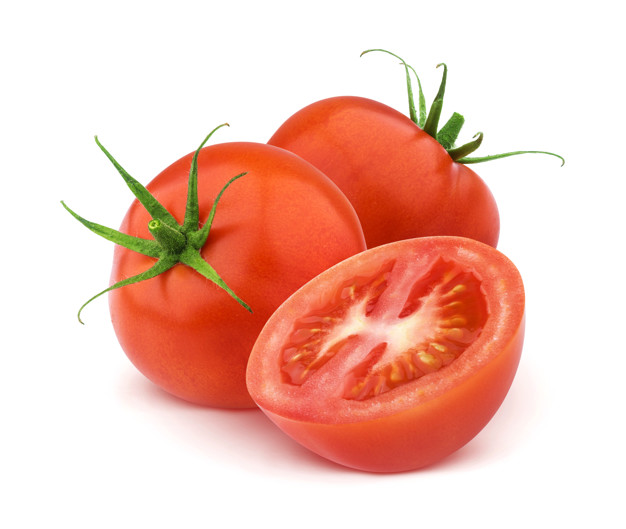

# <center> IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Tomato.csv')

In [3]:
df

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato
...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2741 non-null   object 
 1   Unit     2741 non-null   object 
 2   Minimum  2741 non-null   int64  
 3   Maximum  2741 non-null   int64  
 4   Average  2741 non-null   float64
 5   Market   2741 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 128.6+ KB


In [5]:
df.shape

(2741, 6)

In [6]:
df.describe()

,Minimum,Maximum,Average
count,2741.000000,2741.000000,2741.000000
mean,35.089748,41.281284,38.185516
std,16.648425,17.364135,16.970949
min,8.000000,12.000000,10.000000
25%,22.000000,30.000000,25.000000
50%,30.000000,38.000000,35.000000
75%,45.000000,50.000000,47.500000
max,115.000000,120.000000,117.500000


In [7]:
df.isnull().mean()*100

Date       0.0
Unit       0.0
Minimum    0.0
Maximum    0.0
Average    0.0
Market     0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

# <CENTER>UNIVARIATE ANALYSIS

# HISTPLOT

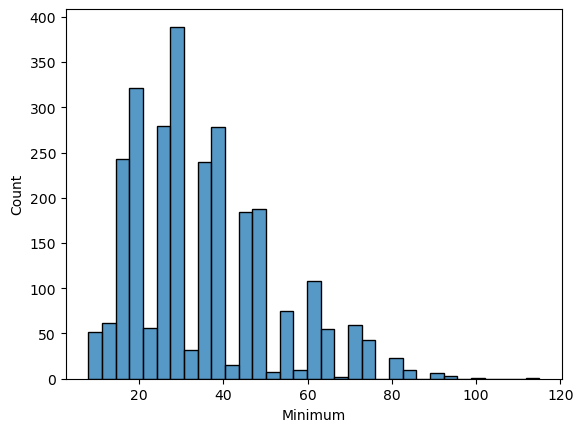

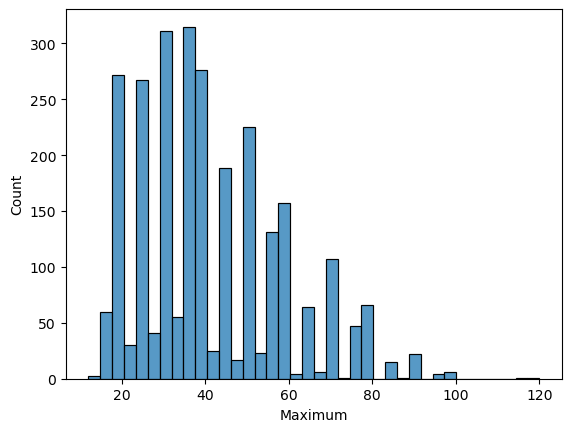

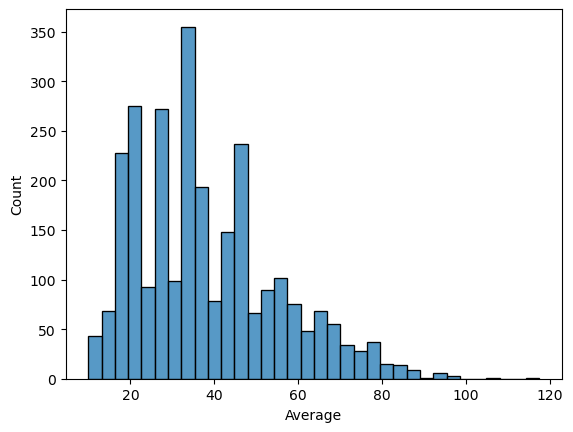

In [9]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

# KDE PLOT

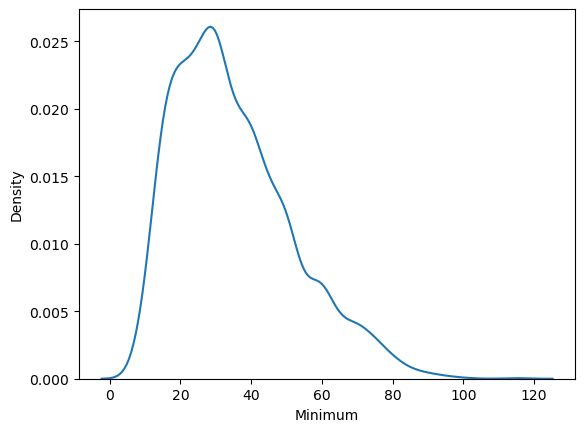

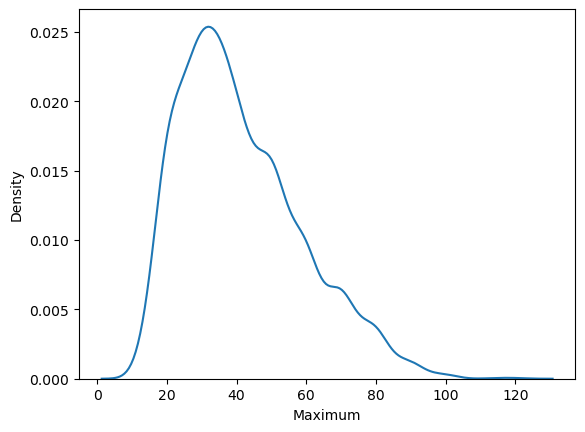

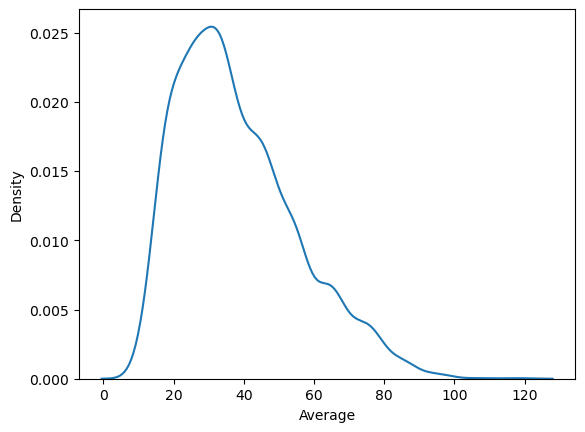

In [10]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

# BOXPLOT

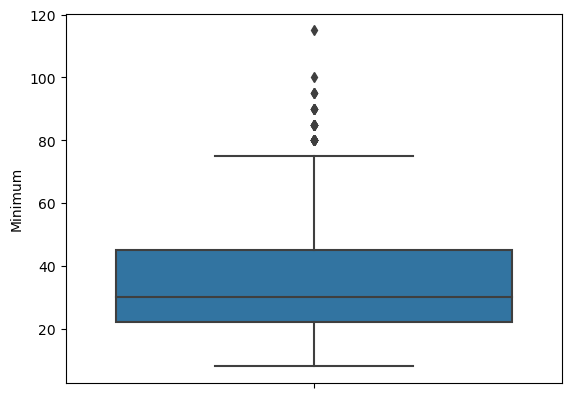

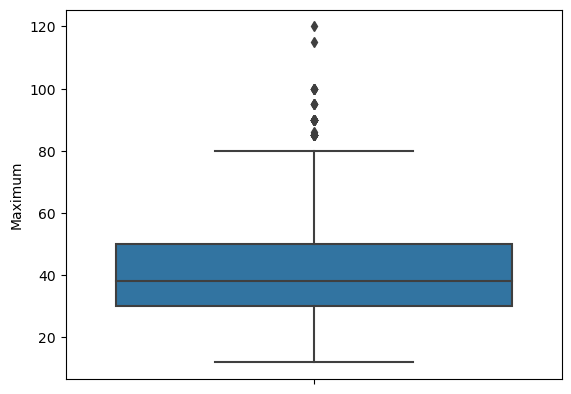

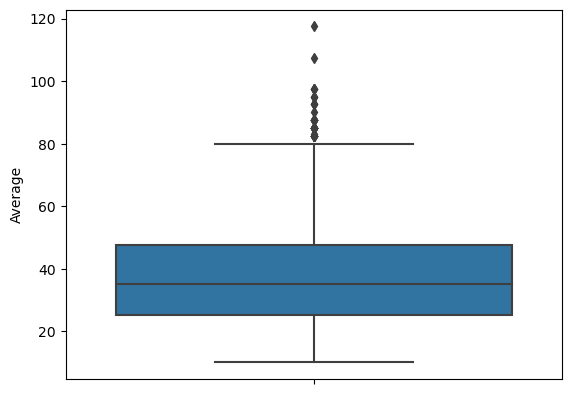

In [11]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

# <CENTER>MULTIVARIATE ANALYSIS

# BARPLOT 


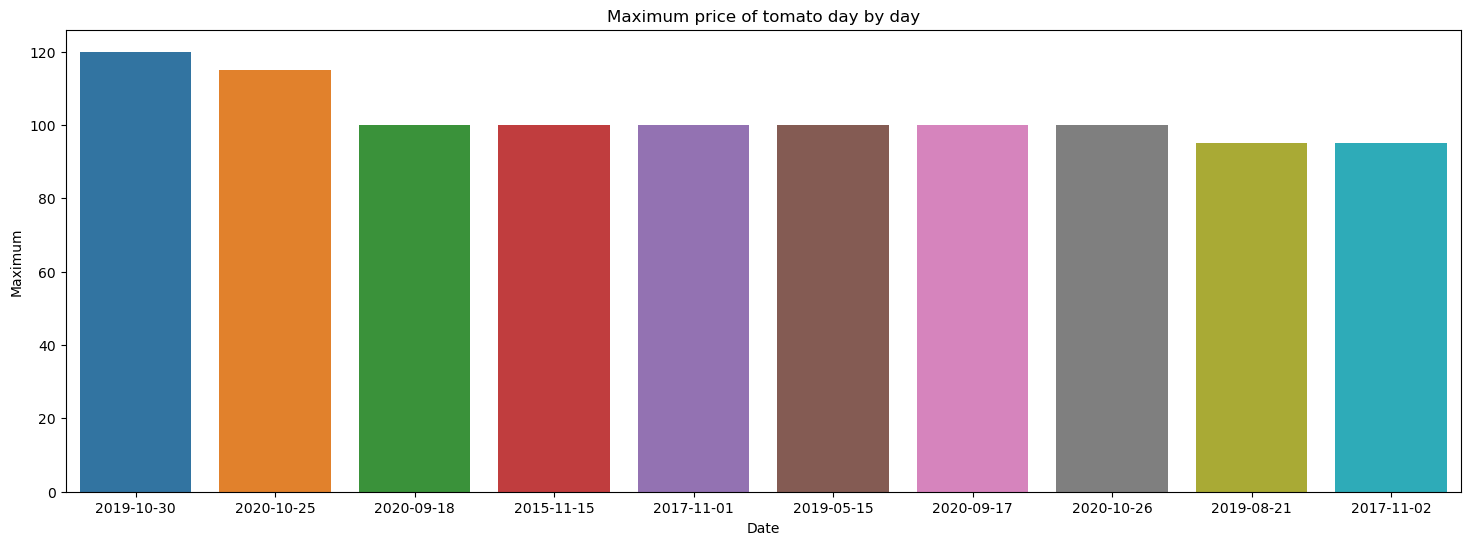

In [12]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Date', y="Maximum", data=df.sort_values(by='Maximum', ascending=False)[:10]).set(title="Maximum price of tomato day by day");

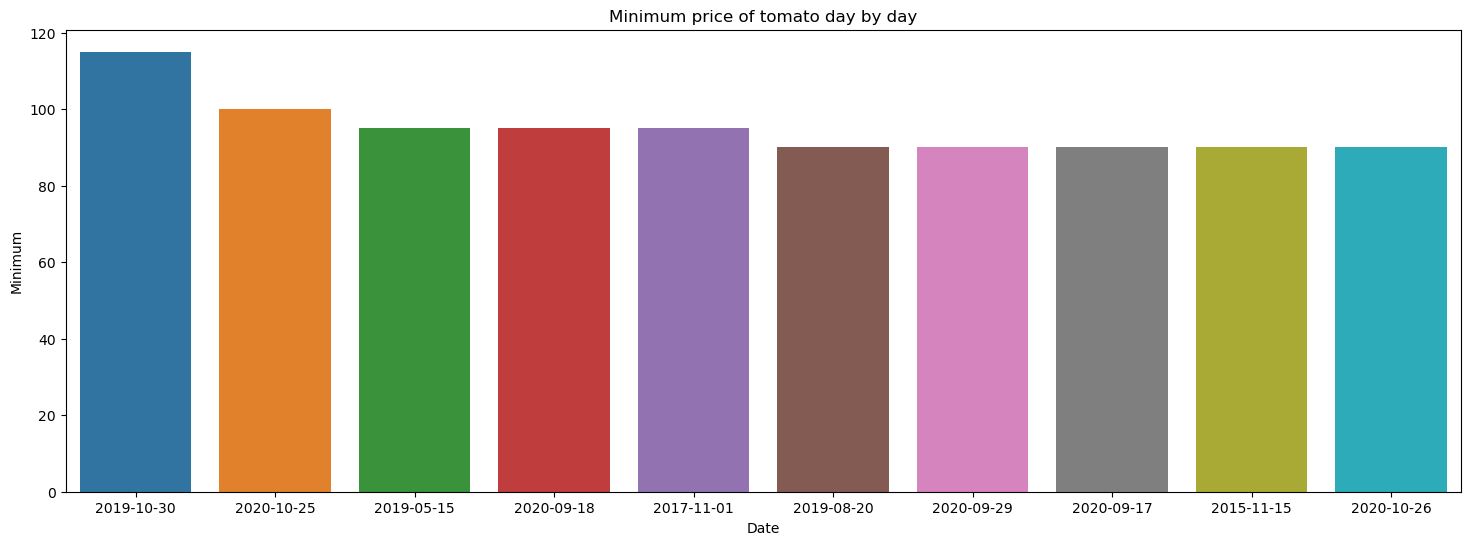

In [13]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Date', y="Minimum", data=df.sort_values(by='Minimum', ascending=False)[:10]).set(title="Minimum price of tomato day by day");

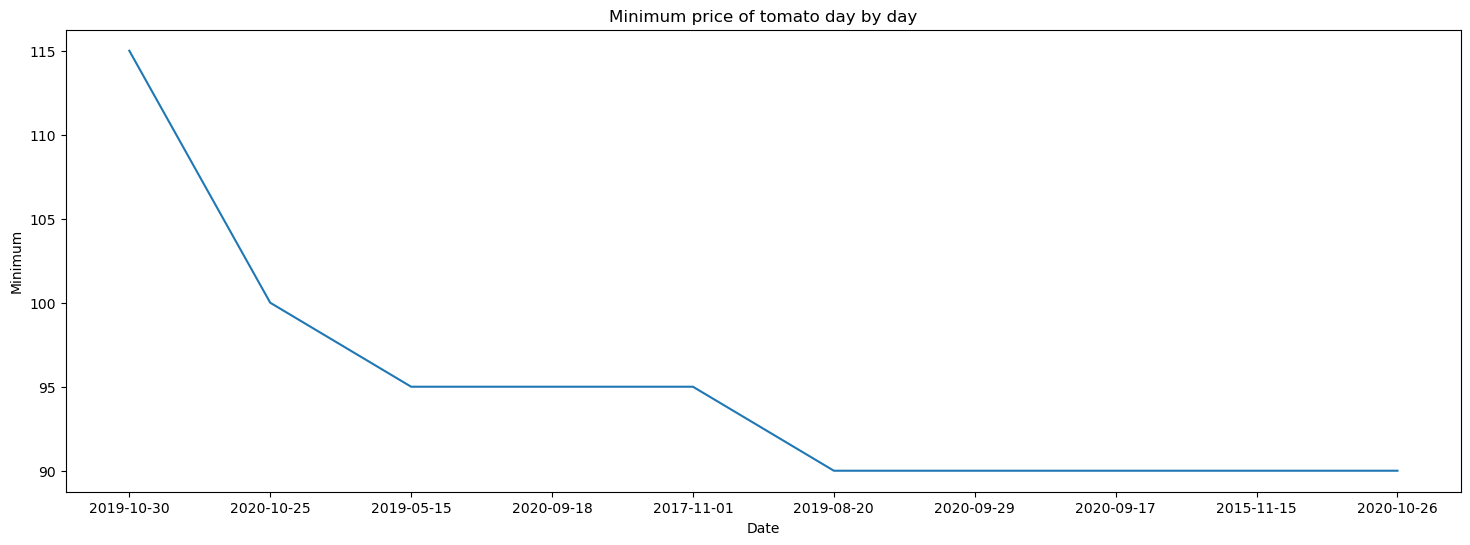

In [14]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y="Minimum", data=df.sort_values(by='Minimum', ascending=False)[:10]).set(title="Minimum price of tomato day by day");

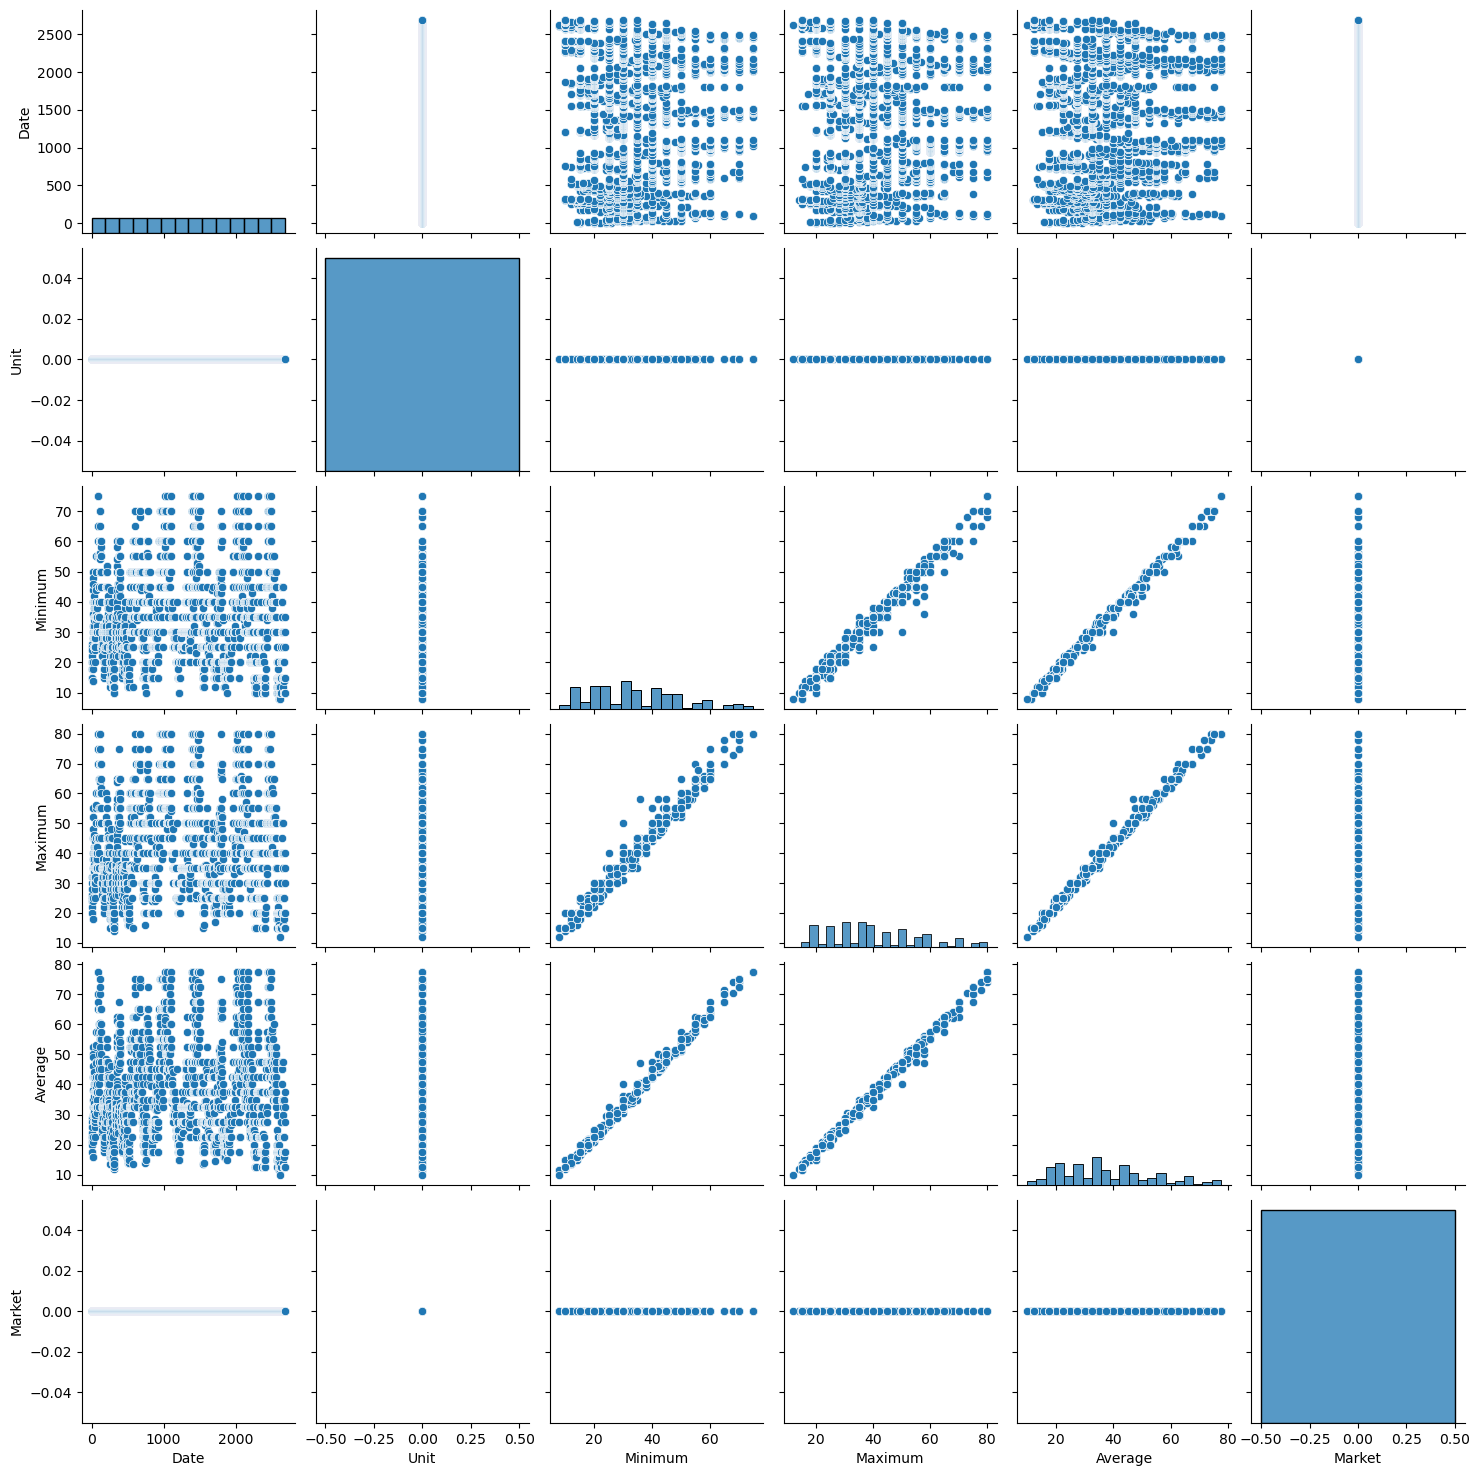

In [35]:
sns.pairplot(data=df)
plt.show();

# OUTLIER TREATMENT

In [15]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [16]:
for column in df.columns:
    if df[column].dtype!='object':
       UL,LL=outlier_limit(df[column])
       df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

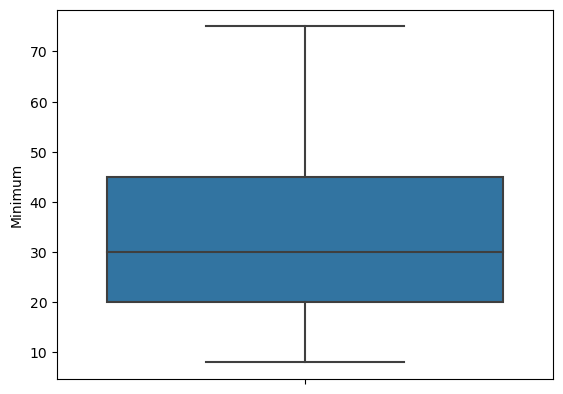

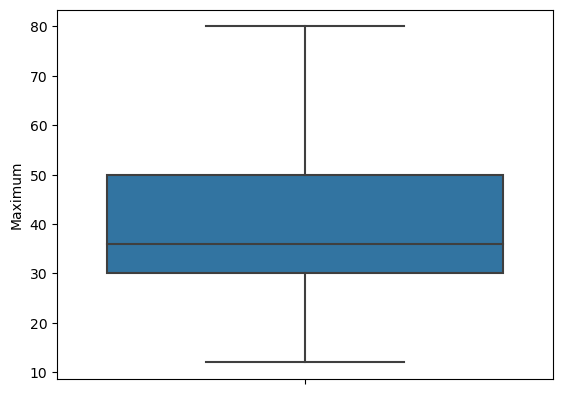

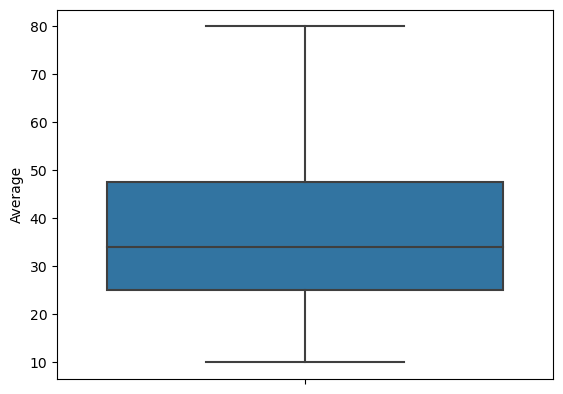

In [17]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [18]:
df.isnull().mean()*100

Date       0.000000
Unit       0.000000
Minimum    1.605254
Maximum    1.824152
Average    1.605254
Market     0.000000
dtype: float64

In [19]:
df.dropna(inplace=True)

# USING LABEL ENCODING

In [20]:
cols=['Date','Unit','Market']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

In [21]:
df

,Date,Unit,Minimum,Maximum,Average,Market
0,0,0,26.0,32.0,29.0,0
1,1,0,20.0,25.0,22.5,0
2,2,0,22.0,26.0,24.0,0
3,3,0,24.0,28.0,26.0,0
4,4,0,22.0,26.0,24.0,0
...,...,...,...,...,...,...
2736,2686,0,10.0,15.0,12.5,0
2737,2687,0,10.0,15.0,12.5,0
2738,2688,0,10.0,15.0,12.5,0
2739,2689,0,30.0,35.0,32.5,0


# CHECKING CORRELATION USING HEATMAP

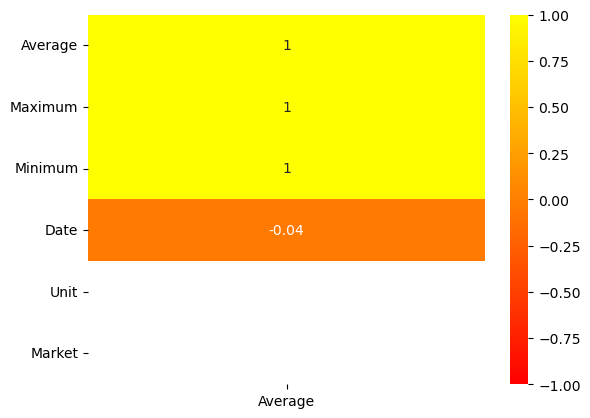

In [22]:
sns.heatmap(df.corr()[['Average']].sort_values(by="Average",
                                                ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

# SELECTING X & Y

In [23]:
x=df[['Maximum','Minimum']].values

In [24]:
y=df[['Average']].values

# FEATURE SCALING

In [25]:
sc=StandardScaler()

In [26]:
x=sc.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# MODEL BUILDING

In [28]:
models={
    'LinearRegression':LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [29]:
for name,model in models.items():
    scores=cross_val_score(model, x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average =np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 1.0160023781679649e-14
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 0.0034990095943509937
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 2.3847681876027333e-11
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 0.18745838925629513
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 0.13728976878301424
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 0.9237117067231185
***********************************************

# MODEL BUILDING USING RIDGE

In [30]:
model=Ridge()

In [31]:
model.fit(x_train,y_train)

Ridge()

In [32]:
y_pred=model.predict(x)

# PREDICTING Y

In [33]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,29.0,29.001840
1,22.5,22.503738
2,24.0,24.003916
3,26.0,26.003486
4,24.0,24.003916


# SCATTERPLOT

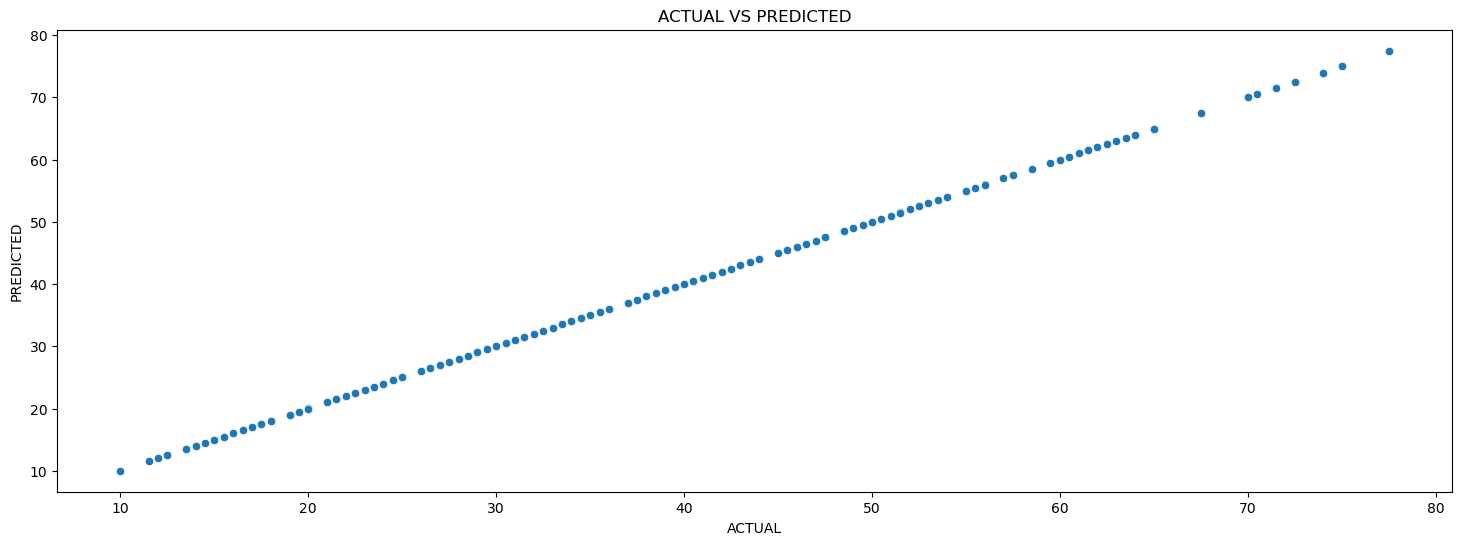

In [34]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");